<a href="https://colab.research.google.com/github/DanteReyesM/DataScienceEcosystem/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
pd.set_option('display.max_rows', None) # Set display option to show all rows

file_path = '/content/drive/MyDrive/Colab Notebooks/Kaggle House Prices Advanced/train.csv'
df_train = pd.read_csv(file_path)
df_train.drop(columns='Id', inplace=True)
print(df_train.head())



   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     20850

In [36]:
df_train.replace(' ',np.nan,inplace=True)
print(df_train.isna().sum()/len(df_train)*100)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [37]:
# Calculate the percentage of missing values for each column
missing_values_percentage = df_train.isna().sum() / len(df_train) * 100

# Filter to show only columns with missing values
columns_with_missing_values = missing_values_percentage[missing_values_percentage > 0]

# Display the result
print("Columns with missing values and their percentage:")
print(columns_with_missing_values)

# Display the data types of columns with missing values
print("\nData types of columns with missing values:")
print(df_train[columns_with_missing_values.index].dtypes)

Columns with missing values and their percentage:
LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Data types of columns with missing values:
LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC       

In [38]:
# 1. Separar X e y
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. REDEFINIR las columnas usando solo X_train (donde ya no está SalePrice)
numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns

# 4. Ahora sí, aplicar los imputadores
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge # Estimador por defecto para la regresión

# 1. Instanciar el imputador
# Usamos BayesianRidge, que es robusto para este tipo de tareas
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=42)

# 2. Ajustar y transformar solo las columnas numéricas de X_train
# Es vital no incluir la columna 'Id' si está presente, para no sesgar el modelo
X_train_num_imputed = imputer.fit_transform(X_train[numerical_cols])

# 3. Transformar X_test usando el imputer ya entrenado (Evita Data Leakage)
X_test_num_imputed = imputer.transform(X_test[numerical_cols])

# 4. Convertir de vuelta a DataFrame para mantener la estructura
X_train[numerical_cols] = pd.DataFrame(X_train_num_imputed, columns=numerical_cols, index=X_train.index)
X_test[numerical_cols] = pd.DataFrame(X_test_num_imputed, columns=numerical_cols, index=X_test.index)

In [39]:
from sklearn.impute import SimpleImputer

# 1. Definir el imputador categórico
# Usamos 'constant' con 'None' porque en este dataset NA suele significar "No tiene"
cat_imputer = SimpleImputer(strategy='constant', fill_value='None')

# 2. Aplicarlo a tus conjuntos actuales
X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

In [40]:
from sklearn.preprocessing import OneHotEncoder

# 1. Instanciar el encoder
# sparse_output=False para obtener una matriz normal y no una comprimida
# handle_unknown='ignore' es vital para que no falle si el test tiene una categoría nueva
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 2. Ajustar y transformar X_train (solo las columnas categóricas)
X_train_encoded_raw = encoder.fit_transform(X_train[categorical_cols])

# 3. Transformar X_test usando el conocimiento del train
X_test_encoded_raw = encoder.transform(X_test[categorical_cols])

# 4. Obtener los nombres de las nuevas columnas (ej. Neighborhood_CollgCr)
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# 5. Convertir a DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded_raw, columns=encoded_cols, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded_raw, columns=encoded_cols, index=X_test.index)

# 6. Unir con las columnas numéricas que ya tenías imputadas
X_train_final = pd.concat([X_train[numerical_cols], X_train_encoded], axis=1)
X_test_final = pd.concat([X_test[numerical_cols], X_test_encoded], axis=1)

print(f"Dataset listo. Nuevas dimensiones: {X_train_final.shape}")

Dataset listo. Nuevas dimensiones: (1168, 301)


In [41]:
from sklearn.preprocessing import StandardScaler

# 1. Instanciar el escalador
scaler = StandardScaler()

# 2. IMPORTANTE: Ajustar solo con los datos de entrenamiento para evitar fuga de datos
# Aplicamos el escalado a todo el DataFrame final (numéricas y las resultantes del encoding)
X_train_scaled = scaler.fit_transform(X_train_final)

# 3. Transformar el conjunto de prueba usando los parámetros del entrenamiento
X_test_scaled = scaler.transform(X_test_final)

# 4. Convertir de nuevo a DataFrame para mantener la legibilidad
X_train_ready = pd.DataFrame(X_train_scaled, columns=X_train_final.columns, index=X_train_final.index)
X_test_ready = pd.DataFrame(X_test_scaled, columns=X_test_final.columns, index=X_test_final.index)

print("Datos escalados y listos para el entrenamiento.")

Datos escalados y listos para el entrenamiento.


In [42]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# 1. Instanciar el modelo
# Usamos hiperparámetros base recomendados para empezar
model_xgb = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42
)

# 2. Entrenar el modelo
model_xgb.fit(
    X_train_ready, y_train,
    eval_set=[(X_test_ready, y_test)],
    verbose=False
)

# 3. Realizar predicciones
y_pred = model_xgb.predict(X_test_ready)

# 4. Evaluación del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 23950.88
R² Score: 0.9252


<Figure size 1000x800 with 0 Axes>

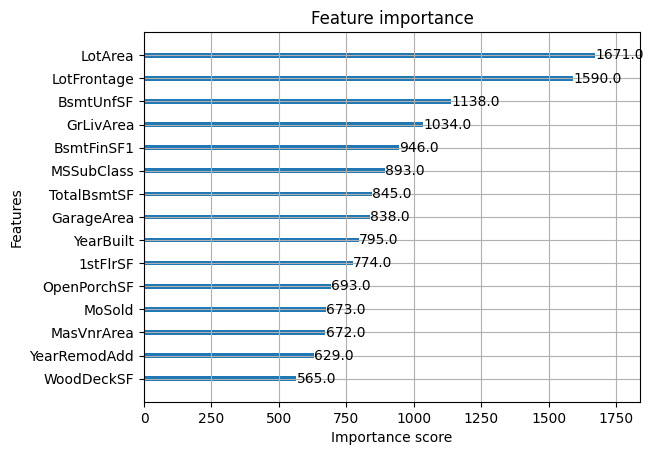

In [43]:
# Graficar las 15 variables más importantes
plt.figure(figsize=(10, 8))
xgb.plot_importance(model_xgb, max_num_features=15)
plt.show()

In [46]:
# A. Definición de la función (Asegúrate de que use la ruta del TEST.csv)
def procesar_test_kaggle(file_path_test, numerical_cols, categorical_cols, imputer, cat_imputer, encoder, scaler):
    # Cargamos el archivo que entra por el parámetro
    file_path_test = '/content/drive/MyDrive/Colab Notebooks/Kaggle House Prices Advanced/test.csv'
    df_test_final_raw = pd.read_csv(file_path_test)
    test_ids = df_test_final_raw['Id']
    df_test_final_raw.drop(columns='Id', inplace=True)

    # Imputación
    df_test_final_raw[numerical_cols] = imputer.transform(df_test_final_raw[numerical_cols])
    df_test_final_raw[categorical_cols] = cat_imputer.transform(df_test_final_raw[categorical_cols])

    # Encoding
    test_encoded_raw = encoder.transform(df_test_final_raw[categorical_cols])
    encoded_cols = encoder.get_feature_names_out(categorical_cols)
    df_test_encoded = pd.DataFrame(test_encoded_raw, columns=encoded_cols, index=df_test_final_raw.index)

    # Unión y Escalado
    df_test_combined = pd.concat([df_test_final_raw[numerical_cols], df_test_encoded], axis=1)
    test_scaled = scaler.transform(df_test_combined)

    # Creamos el DataFrame final
    X_test_ready_output = pd.DataFrame(test_scaled, columns=df_test_combined.columns, index=df_test_combined.index)

    return X_test_ready_output, test_ids

# B. LLAMADA A LA FUNCIÓN (Aquí es donde se define la variable para el resto del notebook)
ruta_test = '/content/drive/MyDrive/Colab Notebooks/Kaggle House Prices Advanced/test.csv'

X_test_kaggle_ready, test_ids = procesar_test_kaggle(
    ruta_test,
    numerical_cols,
    categorical_cols,
    imputer,
    cat_imputer,
    encoder,
    scaler
)

In [47]:
# 1. Realizar las predicciones
y_final_pred = model_xgb.predict(X_test_kaggle_ready)

# 2. Crear el DataFrame para Kaggle
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': y_final_pred
})

# 3. Guardar el archivo (Asegúrate de tener 1459 filas)
submission.to_csv('submission_house_prices.csv', index=False)

print(f"¡Listo! Archivo generado con {submission.shape[0]} filas.")

¡Listo! Archivo generado con 1459 filas.
